In [8]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0.5, 1.0, 'Intrinsic Dimension $2$')

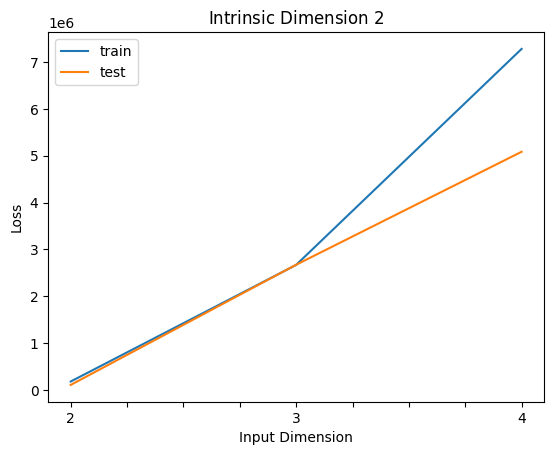

In [31]:
p = Path("cache")

index = []
yerr = []
df = {"train": [], "test": []}

for grandparent in p.iterdir():
    intrinsic_dim = grandparent.name
    for parent in grandparent.iterdir():
        input_dim = parent.name
        index.append(input_dim)
        train_losses = []
        test_losses = []
        for file in parent.iterdir():
            with open(file) as fp:
                data = json.load(fp)
            train_losses.append(data["train_loss"])
            test_losses.append(data["test_loss"])

        avg_train_loss = np.mean(train_losses)
        avg_test_loss = np.mean(test_losses)
        df["train"].append(avg_train_loss)
        df["test"].append(avg_test_loss)

df = pd.DataFrame(df, index=index)
df = df[::-1]
# TODO: figure out how to add error bars!
lines = df.plot.line()
lines.set_xlabel("Input Dimension")
lines.set_ylabel("Loss")
lines.set_title("Intrinsic Dimension $2$")